## Titanic - Machine Learning from Disaster

<img src="https://static1.squarespace.com/static/5006453fe4b09ef2252ba068/5095eabce4b06cb305058603/5095eabce4b02d37bef4c24c/1352002236895/100_anniversary_titanic_sinking_by_esai8mellows-d4xbme8.jpg" alt="Titanic Disaster" style="width: 720px;"/>

<p style="text-align: center;">
  <small>
    [See <a href="https://www.kaggle.com/c/titanic/overview">Titanic - Machine Learning from Disaster (Kaggle URL)</a>]
  </small>
</p>

##### Overview

- object : The competition is simple: use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.
<br>

- evaluation<br>
  $Accuracy=\frac{TP + TN}{TP + TN + FP + FN}$
  - where TP = True positive; FP = False positive; TN = True negative; FN = False negative

##### Data

 * Survived : 0 = died, 1 = survived
<br>

 * Pclass : Ticket class for passengers
   - 1st = Upper
   - 2nd = Middle
   - 3rd = Lower
<br>

 * Sex : gender of passengers (composed of male and female)
<br>

 * Age : Passenger's age (if age less than 1, it's fractional)
<br>

 * Sibsp : The sibsp defines family relations in this way.
   - Sibling = brother, sister, stepbrother, stepsister
   - Spouse = husband, wife
<br>

 * Parch : The parch defines family relations 
   - Parent = mother, father
   - Child = daughter, son, stepdaughter, stepson
<br>

 * Ticket : Number of ticket
 <br>
 
 * Fare : Fare fee of Titanic
 <br>
 
 * cabin : Cabin number
 <br>
 
 * embarked : Port of Embarkation 
   - C = Cherbourg
   - Q = Queenstown
   - S = Southampton

### Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_style("whitegrid")

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold

from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import GradientBoostingClassifier as GBM
from sklearn.svm import SVC

### Collecting CSV data

In [2]:
train = pd.read_csv("../titanic/train.csv")
test = pd.read_csv("../titanic/test.csv")

print(train.shape, test.shape)

(891, 12) (418, 11)


##### Check Nan Data & Data type(int, str)

In [3]:
print(train.isnull().sum(), test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [4]:
train.info(), test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

(None, None)

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### EDA => Feature Engineering

<AxesSubplot:>

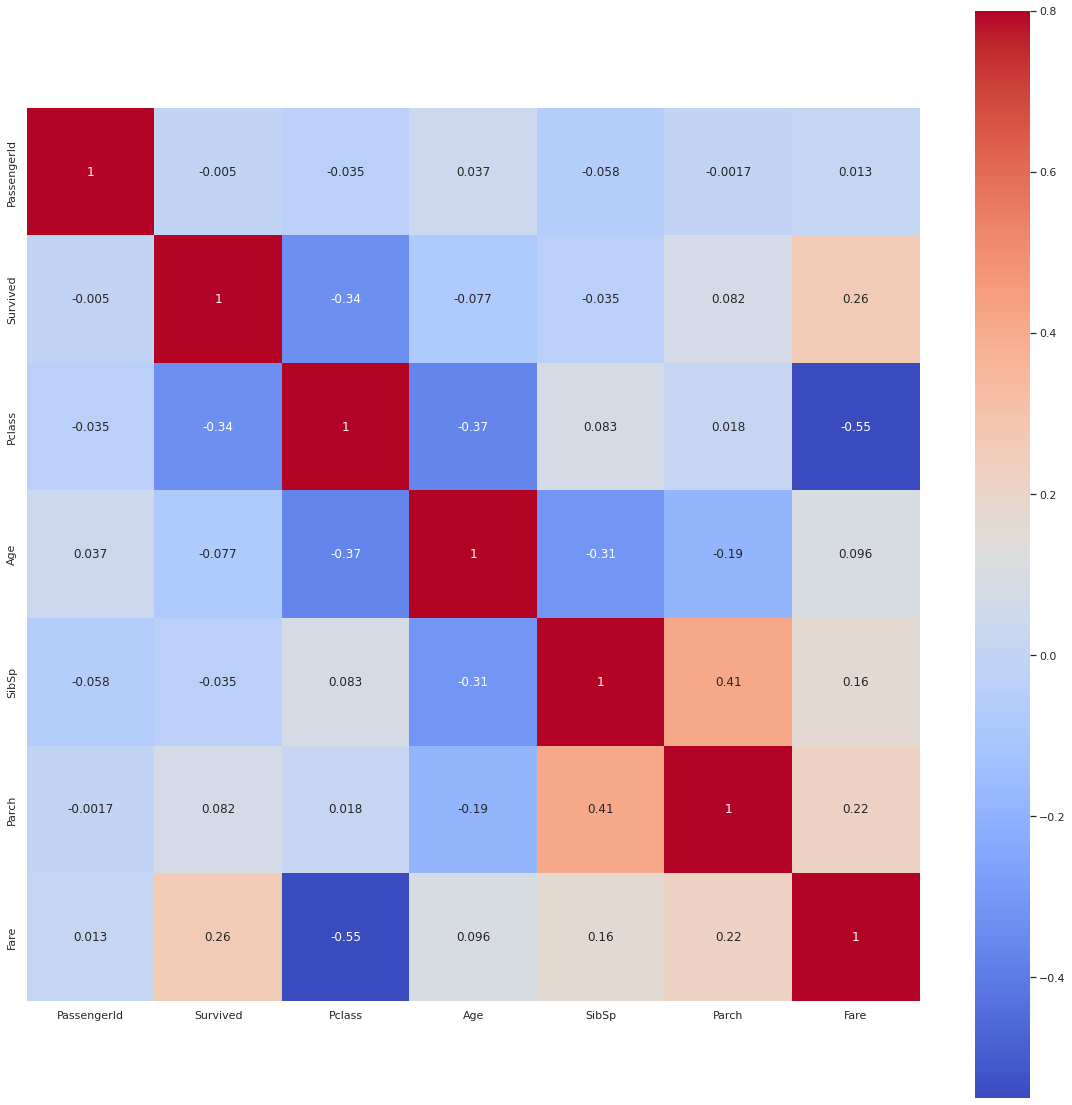

In [7]:
cols = list(train.columns)
corr = train[cols].corr()
mask = np.array(corr)

plt.figure(figsize=(20,20))
sns.heatmap(corr, vmax=0.8, square=True, annot=True, cmap="coolwarm")

In [8]:
def barplot(feature):
    survive = train.loc[train['Survived'] == 1][feature].value_counts()
    dead = train.loc[train['Survived'] == 0][feature].value_counts()
    df = pd.DataFrame([survive, dead])
    df.index = ['Survive', 'Dead']
    df.plot(kind='bar', stacked=True, figsize=(10,8))
    plt.xticks(rotation=0)

In [9]:
def checkna(dataframe, cols_name):
    print(dataframe[cols_name].isnull().sum())

##### Sex

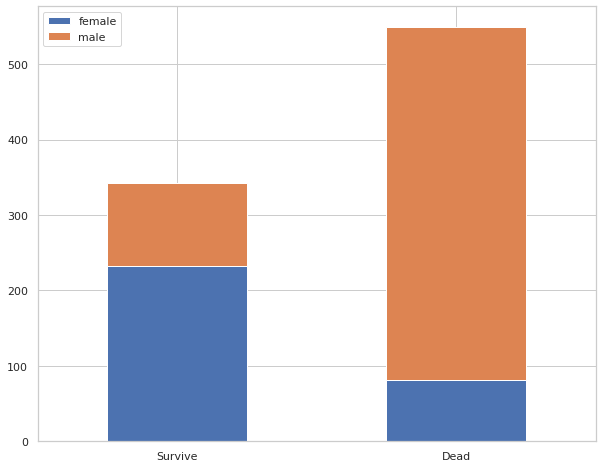

In [10]:
barplot('Sex')

In [11]:
dataset = [train, test]

In [12]:
for data in dataset:
    checkna(data, 'Sex')

0
0


In [13]:
dummies = pd.get_dummies(train['Sex'], prefix='Sex')
train = pd.concat([train, dummies], axis=1)

In [14]:
dummies = pd.get_dummies(test['Sex'], prefix='Sex')
test = pd.concat([test, dummies], axis=1)

##### Pclass

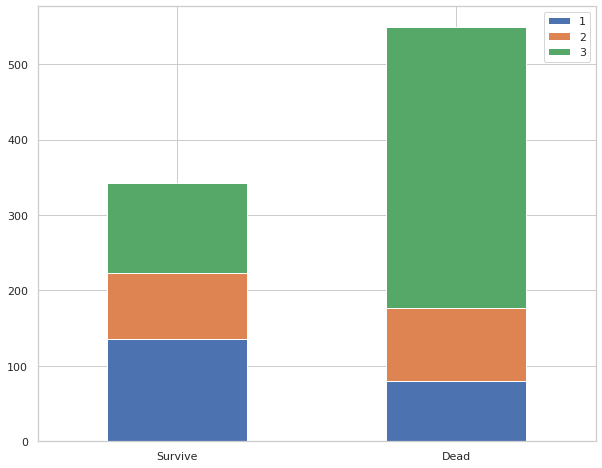

In [15]:
barplot("Pclass")

In [16]:
dummies = pd.get_dummies(train['Pclass'], prefix='Pclass')
train = pd.concat([train, dummies], axis=1)

In [17]:
dummies = pd.get_dummies(test['Pclass'], prefix='Pclass')
test = pd.concat([test, dummies], axis=1)

##### Family Size

In [18]:
dataset = [train, test]
for data in dataset:
    data['Familysize'] = data['SibSp'] + data['Parch'] + 1

In [19]:
test['Fare'].fillna(test.groupby('Pclass')['Fare'].transform('median'), inplace=True)
checkna(test, 'Fare')

0


In [20]:
for data in dataset:
    data.drop(columns=['Pclass', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [21]:
test.columns

Index(['PassengerId', 'Name', 'Age', 'Fare', 'Embarked', 'Sex_female',
       'Sex_male', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Familysize'],
      dtype='object')

##### Fare

In [22]:
train['Fare'].max(), train['Fare'].min()

(512.3292, 0.0)

(0.0, 512.0)

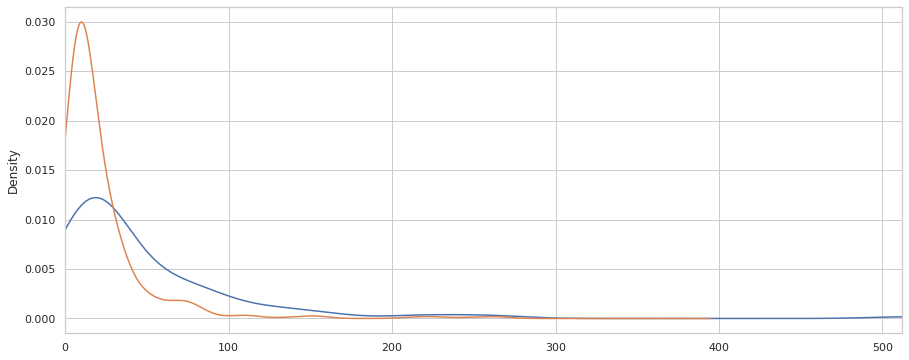

In [23]:
train.loc[train['Survived'] == 1]['Fare'].plot(kind='kde', figsize = (15,6))
train.loc[train['Survived'] == 0]['Fare'].plot(kind='kde', figsize = (15,6))
plt.xlim([0, 512])

In [24]:
def plot_fare(fare_range):
    train.loc[train['Survived'] == 1]['Fare'].plot(kind='kde', figsize = (15,8))
    train.loc[train['Survived'] == 0]['Fare'].plot(kind='kde')
    plt.xlim(fare_range)

(0.0, 0.012)

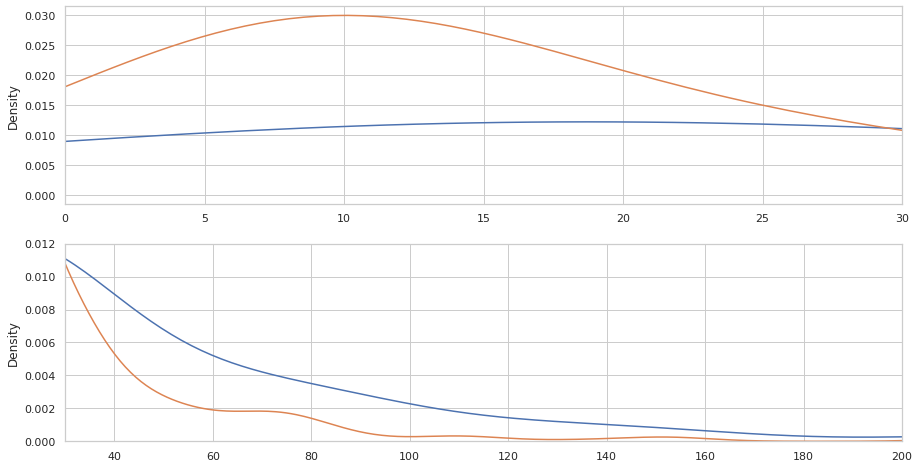

In [25]:
plt.subplot(2, 1, 1)
plot_fare([0, 30])
plt.subplot(2, 1, 2)
plot_fare([30, 200])
plt.ylim([0, 0.012])

(0.0, 0.00015)

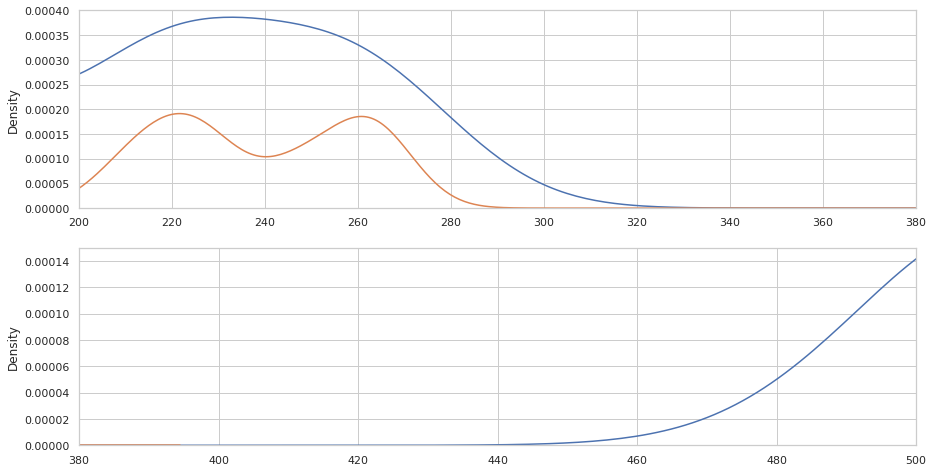

In [26]:
plt.subplot(2, 1, 1)
plot_fare([200, 380])
plt.ylim([0, 0.0004])
plt.subplot(2, 1, 2)
plot_fare([380, 500])
plt.ylim([0, 0.00015])

In [27]:
train.loc[train['Fare'] < 30, "fare_enc"] = 1
train.loc[(train['Fare'] >= 30) & (train['Fare'] < 200), "fare_enc"] = 2
train.loc[(train['Fare'] >= 200) & (train['Fare'] < 380), "fare_enc"] = 3
train.loc[train['Fare'] > 380, "fare_enc"] = 4

In [28]:
for data in dataset:
    data.loc[data['Fare'] < 30, "fare_enc"] = 1
    data.loc[(data['Fare'] >= 30) & (data['Fare'] < 200), "fare_enc"] = 2
    data.loc[(data['Fare'] >= 200) & (data['Fare'] < 380), "fare_enc"] = 3
    data.loc[data['Fare'] >= 380, "fare_enc"] = 4

##### Age

In [29]:
def get_title(Name):
    return Name.split(',')[1].split('.')[0]

In [30]:
train['Title'] = train['Name'].apply(get_title)
train['Title'].unique()

array([' Mr', ' Mrs', ' Miss', ' Master', ' Don', ' Rev', ' Dr', ' Mme',
       ' Ms', ' Major', ' Lady', ' Sir', ' Mlle', ' Col', ' Capt',
       ' the Countess', ' Jonkheer'], dtype=object)

In [31]:
train.loc[train['Title'].str.contains('Mr'), 'Title_enc'] = 1
train.loc[train['Title'].str.contains('Mrs'), 'Title_enc'] = 2
train.loc[train['Title'].str.contains('Miss'), 'Title_enc'] = 3
train.loc[train['Title_enc'].isna(), 'Title_enc'] = 4

In [32]:
test['Title'] = test['Name'].apply(get_title)
test['Title'].unique()

array([' Mr', ' Mrs', ' Miss', ' Master', ' Ms', ' Col', ' Rev', ' Dr',
       ' Dona'], dtype=object)

In [33]:
test.loc[test['Title'].str.contains('Mr'), 'Title_enc'] = 1
test.loc[test['Title'].str.contains('Mrs'), 'Title_enc'] = 2
test.loc[test['Title'].str.contains('Miss'), 'Title_enc'] = 3
test.loc[test['Title_enc'].isna(), 'Title_enc'] = 4

In [34]:
test.drop(columns=['Fare', 'Name', 'Title'], axis=1, inplace=True)
train.drop(columns=['Fare', 'Name', 'Title'], axis=1, inplace=True)

In [35]:
train['Embarked'].fillna('S', inplace=True)

In [36]:
train['Embarked_Q'] = train['Embarked'] == "Q"
train['Embarked_S'] = train['Embarked'] == "S"
train['Embarked_C'] = train['Embarked'] == "C"

In [37]:
test['Embarked_Q'] = test['Embarked'] == "Q"
test['Embarked_S'] = test['Embarked'] == "S"
test['Embarked_C'] = test['Embarked'] == "C"

##### Title

In [38]:
def plot_age(age_range):
    train.loc[train['Survived'] == 1]['Age'].plot(kind='kde', figsize = (15,8))
    train.loc[train['Survived'] == 0]['Age'].plot(kind='kde')
    plt.xlim(age_range)

In [39]:
checkna(train, 'Age'), checkna(test, 'Age')

177
86


(None, None)

In [40]:
train['Age'].fillna(train.groupby('Title_enc')['Age'].transform('median'), inplace=True)
test['Age'].fillna(test.groupby('Title_enc')['Age'].transform('median'), inplace=True)

In [41]:
checkna(train, 'Age'), checkna(test, 'Age')

0
0


(None, None)

In [42]:
train['Age'].max()

80.0

In [43]:
train.columns

Index(['PassengerId', 'Survived', 'Age', 'Embarked', 'Sex_female', 'Sex_male',
       'Pclass_1', 'Pclass_2', 'Pclass_3', 'Familysize', 'fare_enc',
       'Title_enc', 'Embarked_Q', 'Embarked_S', 'Embarked_C'],
      dtype='object')

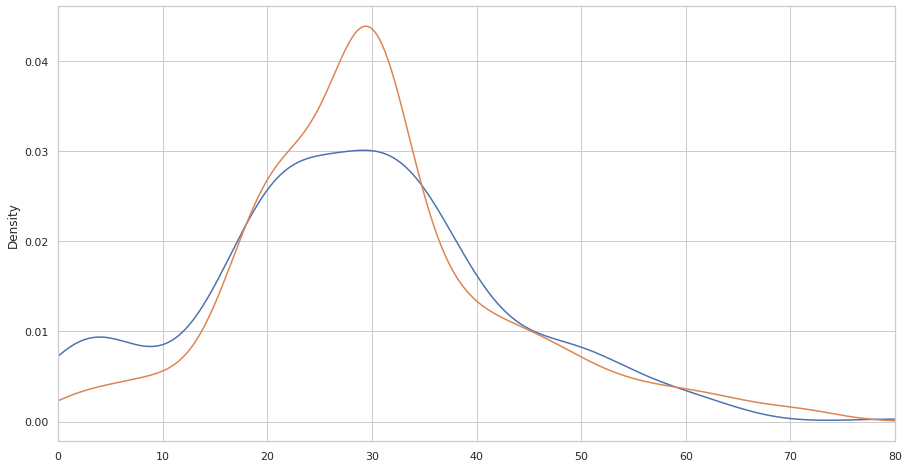

In [44]:
plot_age([0,80])

(0.0, 0.05)

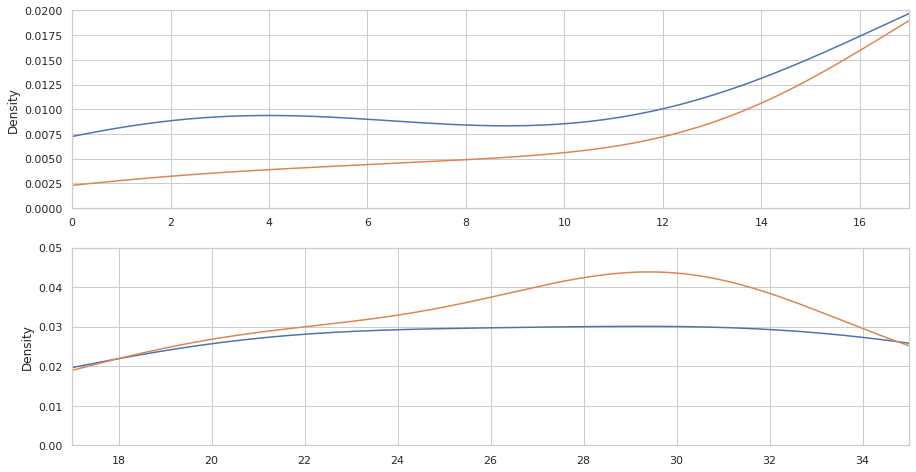

In [45]:
plt.subplot(2, 1, 1)
plot_age([0,17])
plt.ylim([0, 0.02])
plt.subplot(2, 1, 2)
plot_age([17,35])
plt.ylim([0, 0.05])

(0.0, 0.004)

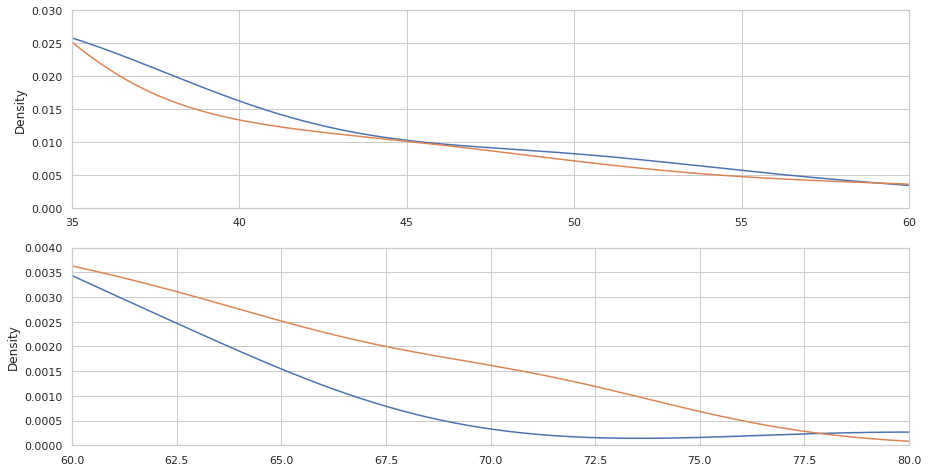

In [46]:
plt.subplot(2, 1, 1)
plot_age([35, 60])
plt.ylim([0, 0.03])
plt.subplot(2, 1, 2)
plot_age([60, 80])
plt.ylim([0, 0.004])

In [47]:
for data in dataset:
    data.loc[data['Age'] < 16, "Age_enc"] = 1
    data.loc[(data['Age'] >= 16) & (data['Age'] < 36), "Age_enc"] = 2
    data.loc[(data['Age'] >= 36) & (data['Age'] < 60), "Age_enc"] = 3
    data.loc[data['Age'] >= 60, "Age_enc"] = 4

In [48]:
for data in dataset:
    data.drop(columns='Age', axis=1, inplace=True)

In [49]:
checkna(test, 'Age_enc')

0


In [50]:
for data in dataset:
    data.drop(columns=['Embarked'], axis=1, inplace=True)

In [51]:
train.columns

Index(['PassengerId', 'Survived', 'Sex_female', 'Sex_male', 'Pclass_1',
       'Pclass_2', 'Pclass_3', 'Familysize', 'fare_enc', 'Title_enc',
       'Embarked_Q', 'Embarked_S', 'Embarked_C', 'Age_enc'],
      dtype='object')

In [52]:
x_train = train[['Sex_female', 'Sex_male', 'Pclass_1',
       'Pclass_2', 'Pclass_3', 'Familysize', 'fare_enc', 'Title_enc',
       'Embarked_Q', 'Embarked_S', 'Embarked_C', 'Age_enc']]
y_train = train['Survived']

In [53]:
x_test = test[['Sex_female', 'Sex_male', 'Pclass_1', 'Pclass_2',
       'Pclass_3', 'Familysize', 'fare_enc', 'Title_enc', 'Embarked_Q',
       'Embarked_S', 'Embarked_C', 'Age_enc']]

### ML modeling

In [54]:
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
model_list = [DT(), KNN(n_neighbors=5, n_jobs=-1), RFC(), GBM(), SVC()]

for model in model_list:
    score = cross_val_score(model, x_train, y_train, 
                            cv=k_fold, n_jobs=-1, scoring='accuracy').mean()
    print(f"{str(model)} Score : {np.round(score,3)}")

DecisionTreeClassifier() Score : 0.814
KNeighborsClassifier(n_jobs=-1) Score : 0.82
RandomForestClassifier() Score : 0.822
GradientBoostingClassifier() Score : 0.832
SVC() Score : 0.827


In [55]:
clf = RFC(n_jobs=-1, random_state=0)
clf.fit(x_train, y_train)

result = clf.predict(x_test)

In [56]:
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
print(indices)

# Print the feature ranking
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print(f"{f+1}. feature {indices[f]} : {x_train.columns[f]} ({importances[indices[f]]})")

[ 7  5  0  1 11  4  6  2  3  9 10  8]
Feature ranking:
1. feature 7 : Sex_female (0.2077649419028463)
2. feature 5 : Sex_male (0.16029572896148064)
3. feature 0 : Pclass_1 (0.15912812853694544)
4. feature 1 : Pclass_2 (0.12647725582198302)
5. feature 11 : Pclass_3 (0.08837827854840972)
6. feature 4 : Familysize (0.07701449073494956)
7. feature 6 : fare_enc (0.05834979824265504)
8. feature 2 : Title_enc (0.04505715658152834)
9. feature 3 : Embarked_Q (0.02944327258505768)
10. feature 9 : Embarked_S (0.020179482594190376)
11. feature 10 : Embarked_C (0.016342191087888914)
12. feature 8 : Age_enc (0.011569274402065052)


In [57]:
for x in range(10):
    col_num = indices[:len(indices)-x]
    x_train_rev = x_train[x_train.columns[col_num]]
    
    clf = GBM()
    clf.fit(x_train_rev, y_train)
    
    score = cross_val_score(clf, x_train_rev, y_train, 
                            cv=k_fold, n_jobs=-1, scoring='accuracy').mean()
    print(f"Number of Column : {x_train_rev.shape[1]}, Score : {np.round(score,3)}")

Number of Column : 12, Score : 0.831
Number of Column : 11, Score : 0.828
Number of Column : 10, Score : 0.836
Number of Column : 9, Score : 0.836
Number of Column : 8, Score : 0.835
Number of Column : 7, Score : 0.832
Number of Column : 6, Score : 0.832
Number of Column : 5, Score : 0.819
Number of Column : 4, Score : 0.825
Number of Column : 3, Score : 0.825


In [58]:
clf = GBM()
clf.fit(x_train, y_train)

result = clf.predict(x_test)

### ML Modeling

In [59]:
submission = pd.DataFrame({
    "PassengerId" : test["PassengerId"],
    'Survived' : result
})
submission.to_csv('submission.csv', index=False)

submission = pd.read_csv("./submission.csv")
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
